# Example Analysis Pipeline

Here we present a set of examples that cover the main analyses performed in the paper. As an illustrative case study, we use a representative gastruloid dataset to demonstrate the full analysis pipeline, from raw data processing to the extraction of quantitative readouts. The steps shown are the following: 

- Segmentation and debris removal
- Analysis using neighborhood information (density, composition)
- Radial distribution of cells using their 3D position and the segmentation of the gastruloid shape
- Quantification of fluorescence using the segmentation masks.

This example analysis illustrate the main methods used for the results obtained in this work. We have not included a direct example of YAP and p53 quantification as they are variations of the fluorescence quantification shown here.

### Segmentation

First step of the analysis is to performed the segmentation using the `qlivecell`. For more information on that software visit it's github page. In this particular case we are showing, segmentation relies on StarDist. Let's load the relevant packages and the StarDist model we will use.

In [19]:
### LOAD PACKAGE ###
from qlivecell import get_file_name, cellSegTrack, check_or_create_dir, get_file_names, correct_path, fill_channels

# Set progress to false to not overflow with text the notebook.
import qlivecell.config as cfg
cfg.PROGRESS = False

### LOAD STARDIST MODEL ###
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Next, the user must define the direct path to this example folder:

In [20]:
### PATH TO THE EXAMPLES FOLDER ###
PATH = "/home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/"

With this, we can create a folder to store the results and define the relevant paths for the analysis

In [21]:
path_to_data = PATH+"gastruloid.tif"
path_to_results = PATH+"results/"
check_or_create_dir(path_to_results)

Next, we must define the segmentation, concatenation and batch arguments. For the segmentation we use StarDist with a small blur as a preprocessing step (this is done internally on `qlivecell`). For concatenation settings, we define that cells must appear at least on 2 z-planes. Batch settings mainly define the format of the file (.tif in this case) and the main channel of the dataset, which in the case of StarDist segmentation, is going to be the segmented channel. This channels is also used to compute cell centroid.

In [22]:
### DEFINE ARGUMENTS ###
segmentation_args={
    'method': 'stardist2D', 
    'model': model, 
    'blur': [2,1], 
    'min_outline_length':100,
}

concatenation3D_args = {
    'distance_th_z': 3.0, # microns
    'relative_overlap':False, 
    'use_full_matrix_to_compute_overlap':True, 
    'z_neighborhood':2, 
    'overlap_gradient_th':0.3, 
    'min_cell_planes': 2,
}

batch_args = {
    'name_format':"ch"+str(0)+"_{}",
    'extension':".tif",
} 

We define the file to which we want to segment and create a folder to store the segmentation results

In [23]:
file = "gastruloid.tif"
file, embcode = get_file_name(PATH, file, allow_file_fragment=False, return_files=False, return_name=True)
path_to_save = path_to_results+embcode
check_or_create_dir(path_to_save)

Now we can initialize the `cellSegTrack` objects which handle the segmentation. In this case, we will initialize two clases, one for the mCherry channel (F3) and one for the emiRFP channel (A12). 

In [24]:
channel_names = ["F3", "A12", "DAPI", "Casp3", "BF"]

ch = channel_names.index("F3")
batch_args['name_format'] = "ch"+str(ch)+"_{}"
chans = fill_channels(channel=ch, channel_names=channel_names)
        
CT_F3 = cellSegTrack(
    path_to_data,
    path_to_save,
    segmentation_args=segmentation_args,
    concatenation3D_args=concatenation3D_args,
    batch_args=batch_args,
    channels=chans
)


ch = channel_names.index("A12")
batch_args['name_format'] = "ch"+str(ch)+"_{}"                
chans = fill_channels(channel=ch, channel_names=channel_names)

CT_A12 = cellSegTrack(
    path_to_data,
    path_to_save,
    segmentation_args=segmentation_args,
    concatenation3D_args=concatenation3D_args,
    batch_args=batch_args,
    channels=chans
)



###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/gastruloid.tif
#   path to save = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/results/gastruloid/
#                                                                    #
#   No tracking method provided. Using greedy algorithm (if needed)  #
#                                                                    #
#   No time step provided, using 1 minute.                           #
#                                                                    #

###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCompetition_pa

Once the objects are created we can simple run the segmentation. 

In [25]:
CT_F3.run()
CT_A12.run()

###############          BEGIN SEGMENTATIONS          ################
#                                                                    #
#                                                                    #
#   ######   CURRENT TIME = 1/1   ######                             #
#                                                                    #
1/1 [==============================] - 0s 34ms/step
#                                                                    #
#   running concatenation correction... (1/2)                        #
#   concatenation correction completed (1/2)                         #
#   running concatenation correction... (2/2)                        #
#   concatenation correction completed (2/2)                         #
#   running short cell removal...                                    #
#   short cell removal completed                                     #
#   computing attributes...                                          #
#   attributes computed  

Once the segmentation is done, we can load the results in a similar manner. However, in this case we wouldn't need to specify segmentatin and concatenation arguments as we are just going to load the segmentation. 

In [26]:
ch = channel_names.index("F3")
batch_args['name_format'] = "ch"+str(ch)+"_{}"
chans = fill_channels(channel=ch, channel_names=channel_names)
        
CT_F3 = cellSegTrack(
    path_to_data,
    path_to_save,
    batch_args=batch_args,
    channels=chans
)

ch = channel_names.index("A12")
batch_args['name_format'] = "ch"+str(ch)+"_{}"                
chans = fill_channels(channel=ch, channel_names=channel_names)

CT_A12 = cellSegTrack(
    path_to_data,
    path_to_save,
    batch_args=batch_args,
    channels=chans
)
CT_F3.load()
CT_A12.load()


###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/gastruloid.tif
#   path to save = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/results/gastruloid/
#                                                                    #
#   No tracking method provided. Using greedy algorithm (if needed)  #
#                                                                    #
#   No time step provided, using 1 minute.                           #
#                                                                    #

###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCompetition_pa

### Debris removal

Once we have our segmentation results are loaded, we can proceed with the post-processing. In this case, we will remove debris that might have been erroniously segmented. For that, we compute a threshold based on the distribution of areas at the center plane of the segmented objects. We define the threshold as the local minina in a Kernel Density Estimation of the distribution of areas.

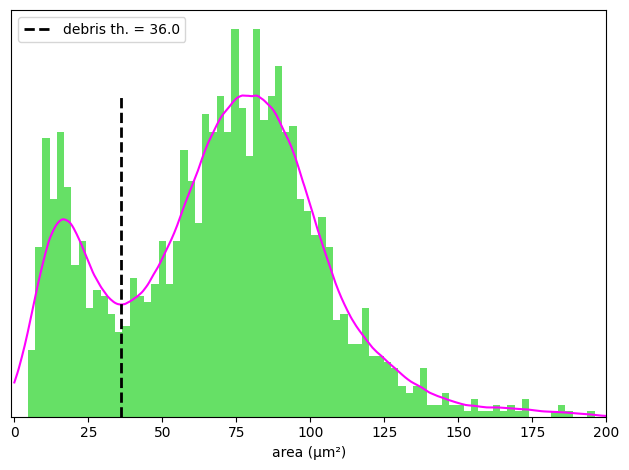

In [27]:
areas = []
for cell in CT_F3.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)

    mask = cell.masks[0][zcid]
    area = len(mask) * CT_F3.metadata["XYresolution"]**2
    areas.append(area)
    
for cell in CT_A12.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)

    mask = cell.masks[0][zcid]
    area = len(mask) * CT_A12.metadata["XYresolution"]**2
    areas.append(area)
    

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots()
data = np.array(areas)
data = np.clip(data, 0, 250)
x = np.arange(0, step=0.5, stop=np.max(data))
bw = 15
modelo_kde = KernelDensity(kernel="linear", bandwidth=bw)
modelo_kde.fit(X=data.reshape(-1, 1))
densidad_pred = np.exp(modelo_kde.score_samples(x.reshape((-1, 1))))
local_minima = argrelextrema(densidad_pred, np.less)[0]
threshold = x[local_minima[0]]
x_th = np.ones(len(x)) * x[local_minima[0]]
y_th = np.linspace(0, np.max(densidad_pred), num=len(x))

ax.hist(data, bins=100, color=[0.0, 0.8, 0.0], density=True, alpha=0.6)
ax.plot(x, densidad_pred, color="magenta")
ax.plot(x_th, y_th, c="k", ls="--",lw=2, label="debris th. = {:0.1f}".format(threshold))
ax.set_xlim(-1,200)
ax.set_xlabel("area (µm²)")
ax.set_yticks([])
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


Once we have our threshold defined, we remove the objects whose area is below the threshold

In [28]:
labs_to_rem = []
for cell in CT_F3.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)
    mask = cell.masks[0][zcid]
    area = len(mask) * CT_F3.metadata["XYresolution"]**2
    if area < threshold:
        labs_to_rem.append(cell.label)

debris_F3 = len(labs_to_rem)
for lab in labs_to_rem:
    CT_F3._del_cell(lab)   
    
CT_F3.update_labels()

labs_to_rem = []
for cell in CT_A12.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)
    mask = cell.masks[0][zcid]
    area = len(mask)* CT_A12.metadata["XYresolution"]**2
    if area < threshold:
        labs_to_rem.append(cell.label)
    
debris_A12 = len(labs_to_rem)
for lab in labs_to_rem:
    CT_A12._del_cell(lab)  
    
CT_A12.update_labels()

With this, the segmentation results are ready to be used in posterior analysis. First thing we can draw from this result is the amount of cells and debris on each of the populations segmented

In [30]:
print("Number of mCherry cells:", len(CT_F3.jitcells))
print("Number of debris objects on the mCherry channel:", debris_F3)
print("Number of emiRFP cells:", len(CT_A12.jitcells))
print("Number of debris objects on the emiRFP channel:", debris_A12)

Number of mCherry cells: 754
Number of debris objects on the mCherry channel: 183
Number of emiRFP cells: 545
Number of debris objects on the emiRFP channel: 166


With this, we can move on with more complex analysis starting with those based on neighborhood analysis.